In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('diabetes.csv')
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [4]:
# Überblick über den Datensatz
print(df.info())

# Statistische Zusammenfassung
print( df.describe())

# Überprüfen auf fehlende Werte
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std    

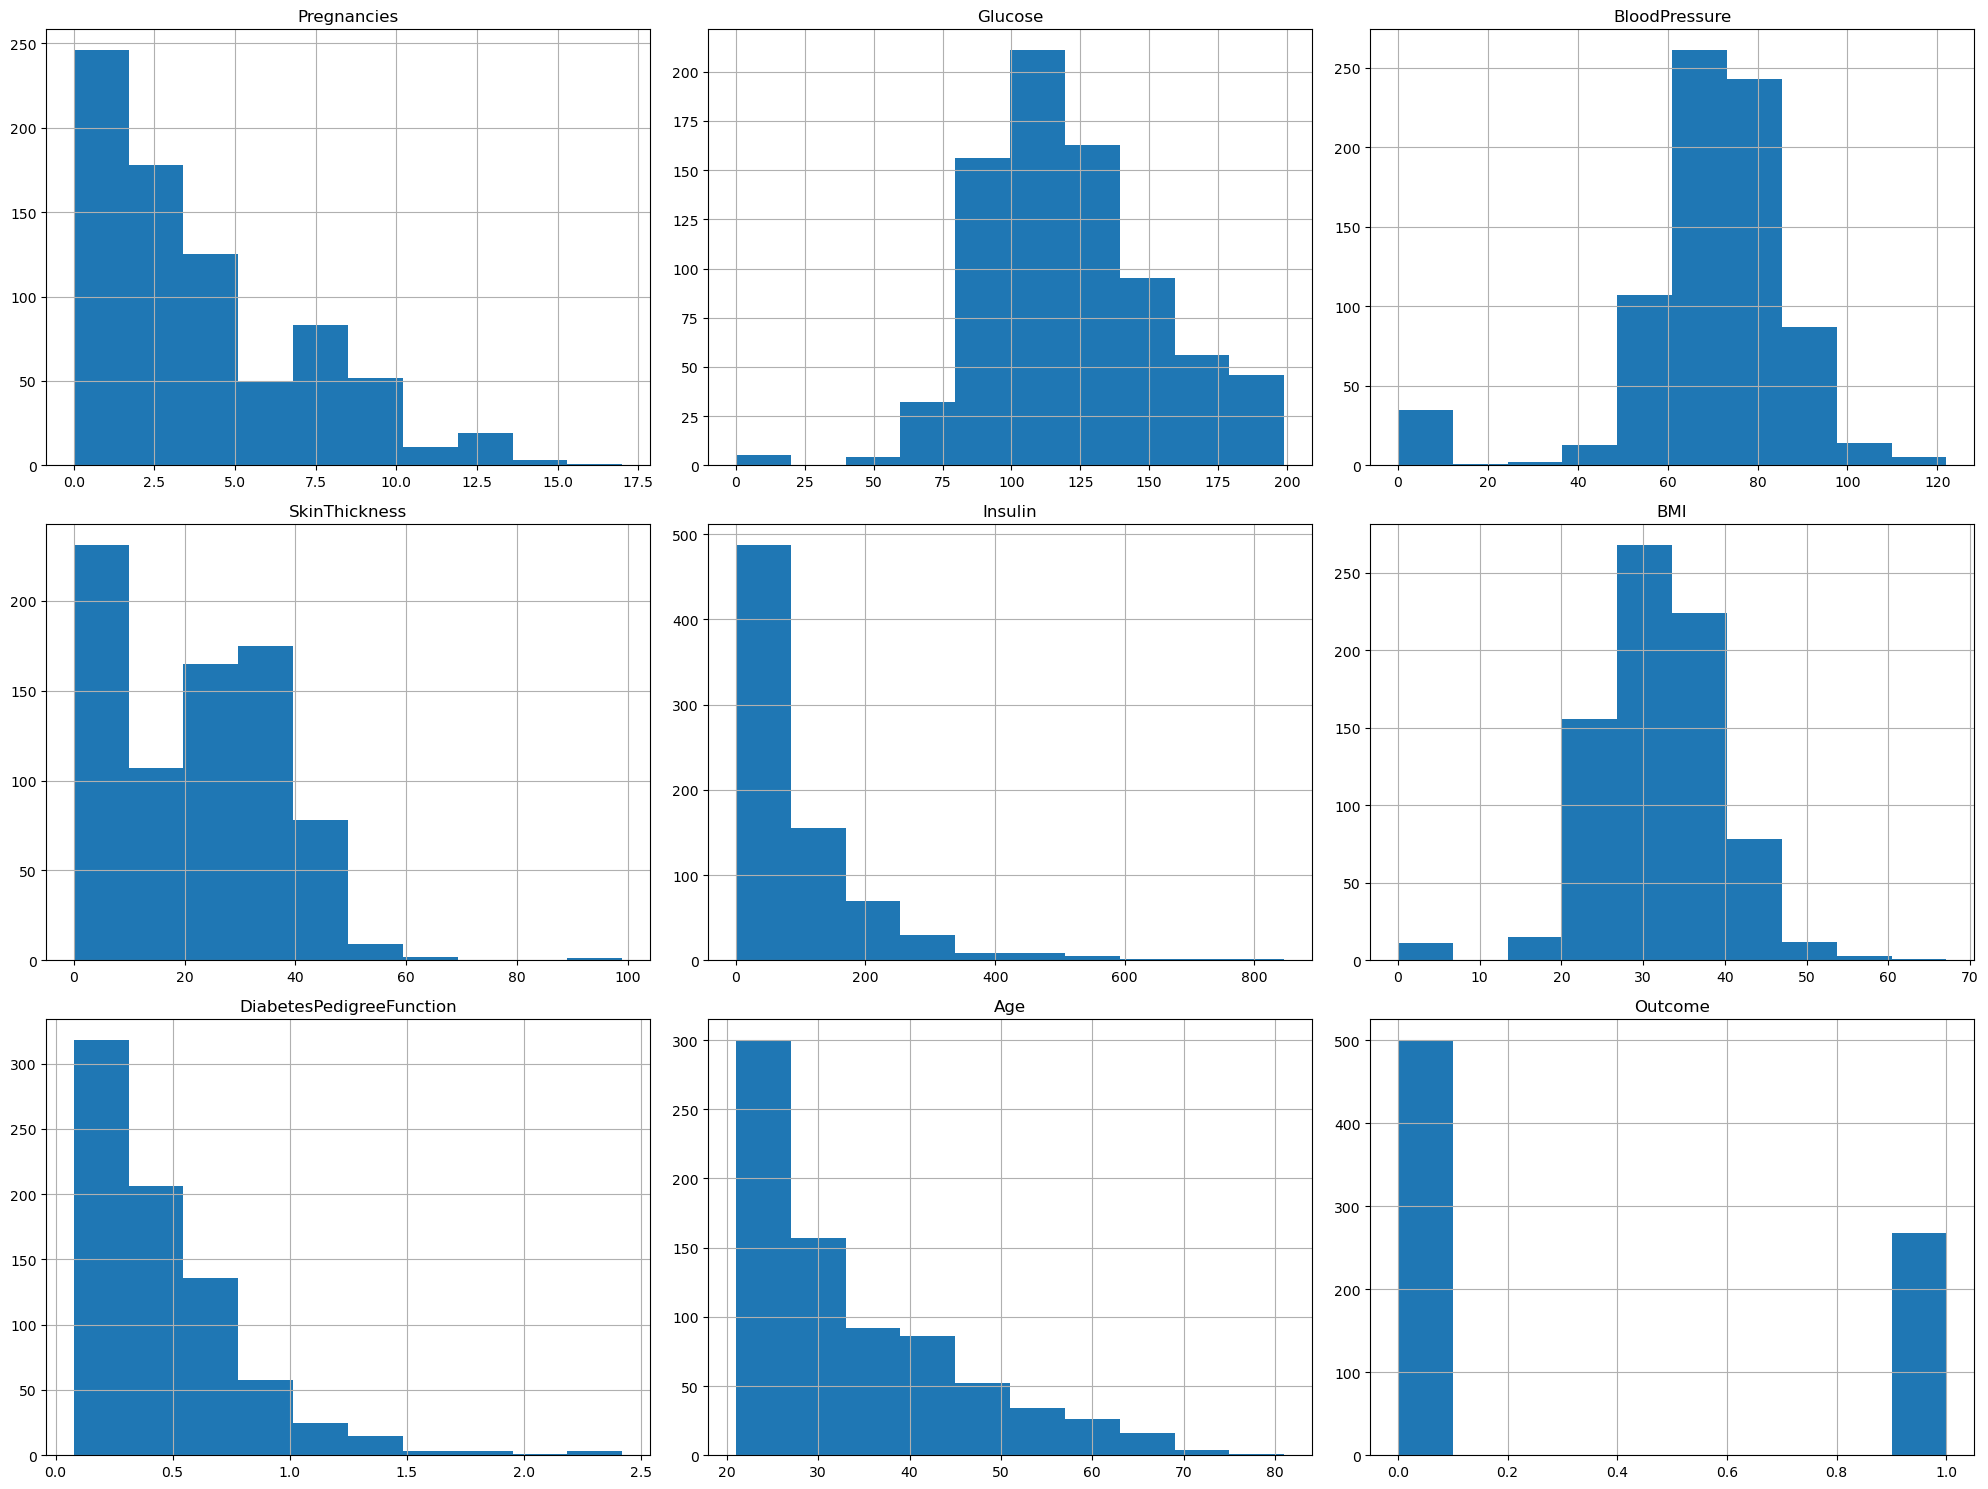

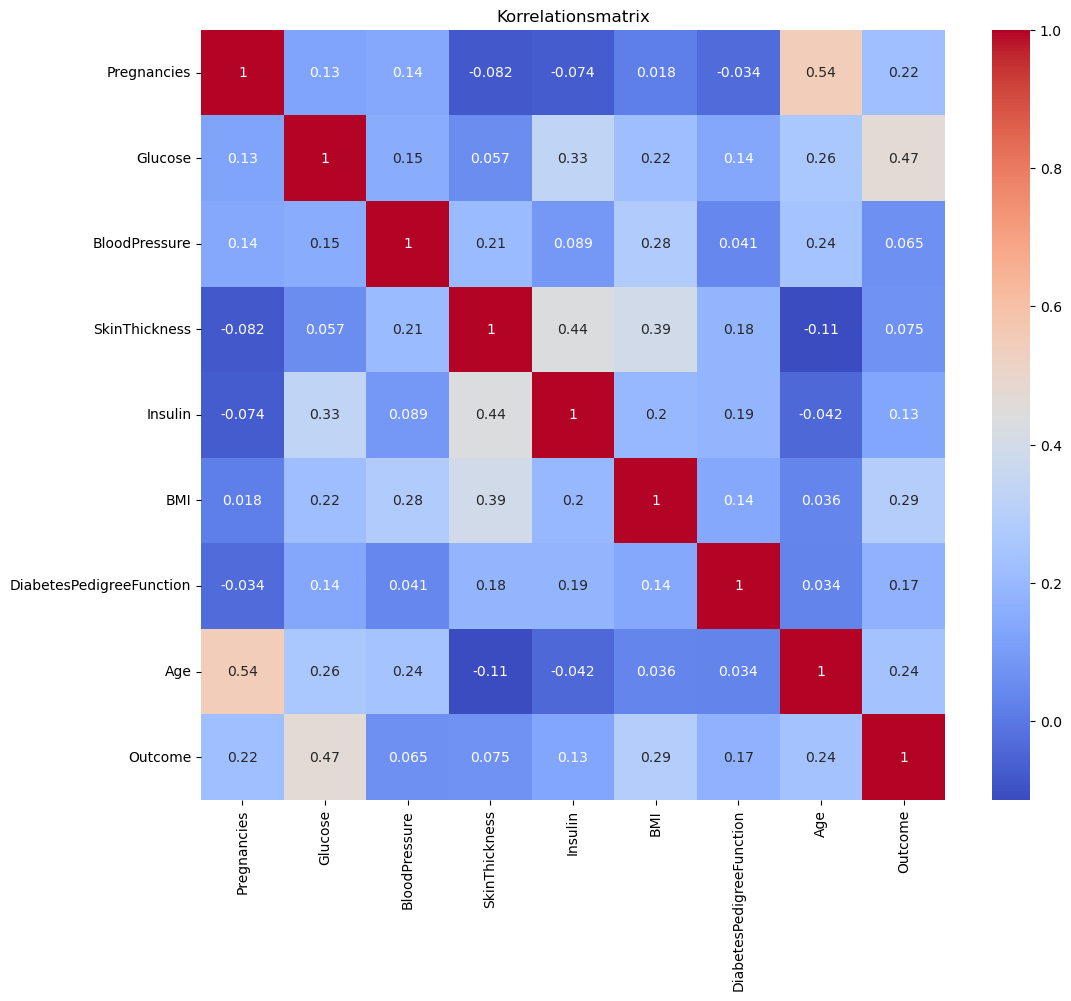

<Figure size 640x480 with 0 Axes>

In [5]:
# Histogramme für jede numerische Spalte
df.hist(figsize=(20,15))
plt.tight_layout()
plt.show()

# Korrelationsmatrix
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Korrelationsmatrix')
plt.show()
plt.savefig('histogramme.png')

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.656250      72.386719      27.334635   94.652344   
std       3.369578   30.438286      12.096642       9.229014  105.547598   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      23.000000   30.500000   
50%       3.000000  117.000000      72.000000      23.000000   31.250000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.450911                  0.471876   33.240885    0.348958  
std      6.875366                  0.331329   11.760232    0.476951  
min     18.200000                  

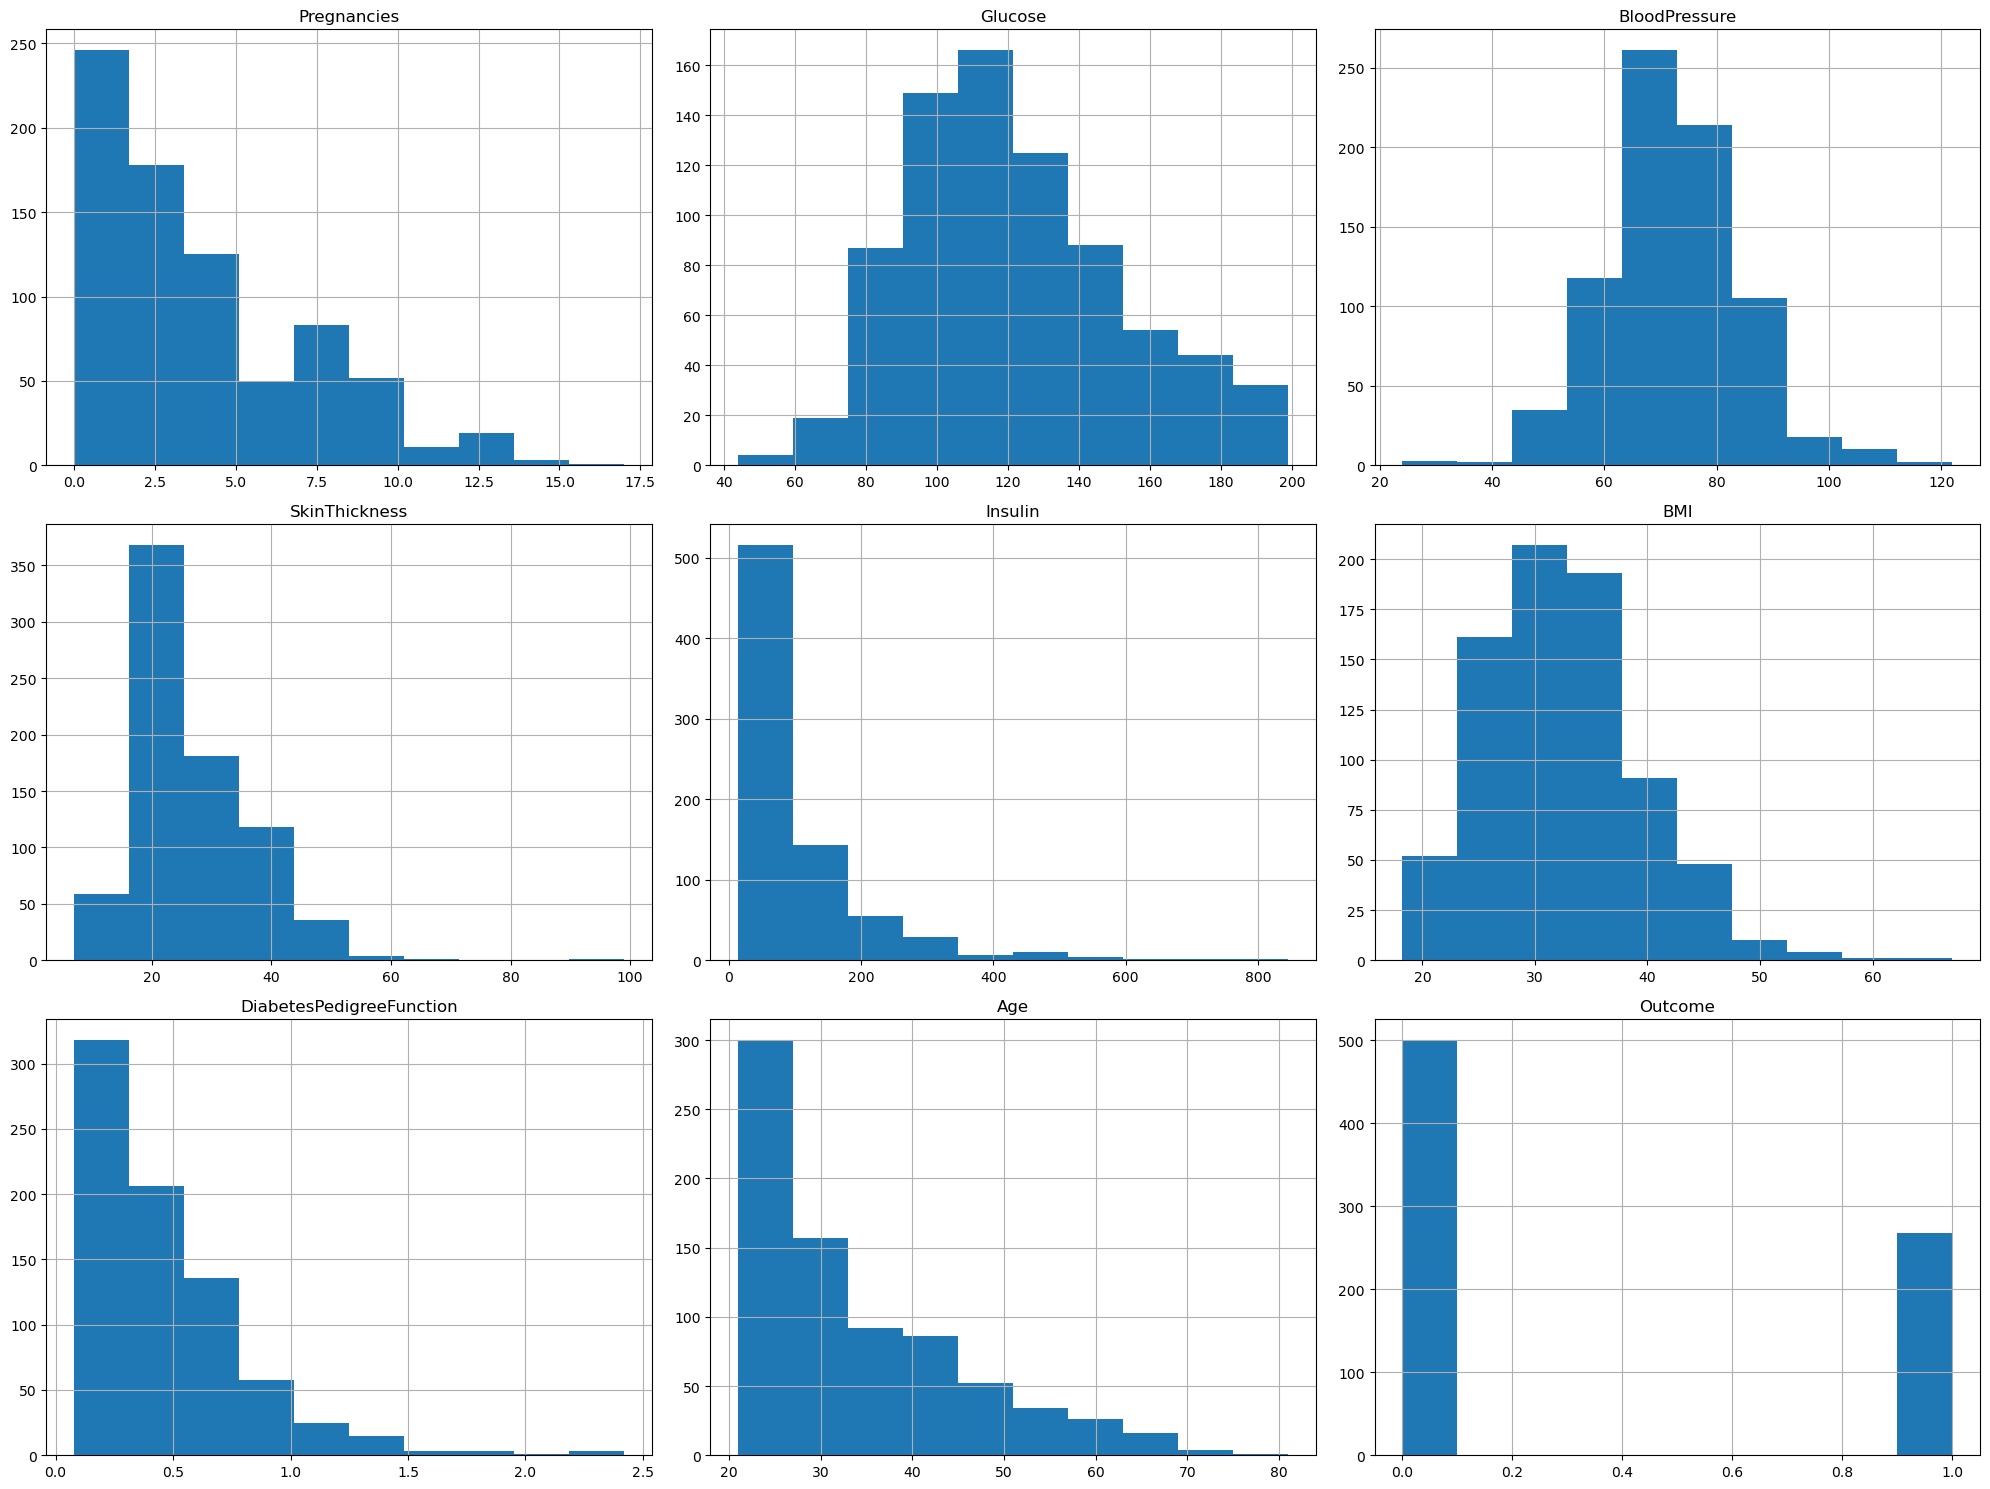

In [6]:
# Ersetzen Sie Nullwerte durch den Median der jeweiligen Spalte
df['Glucose'] = df['Glucose'].replace(0, df['Glucose'].median())
df['BloodPressure'] = df['BloodPressure'].replace(0, df['BloodPressure'].median())
df['SkinThickness'] = df['SkinThickness'].replace(0, df['SkinThickness'].median())
df['Insulin'] = df['Insulin'].replace(0, df['Insulin'].median())
df['BMI'] = df['BMI'].replace(0, df['BMI'].median())

# Überprüfen Sie die Änderungen
print(df.describe())

# Visualisieren Sie die bereinigten Daten erneut
df.hist(figsize=(20,15))
plt.tight_layout()
plt.show()

In [7]:
#Feature Engineering
def bmi_category(bmi):
    if bmi < 18.5:
        return 0  # Untergewicht
    elif bmi < 25:
        return 1  # Normalgewicht
    elif bmi < 30:
        return 2  # Übergewicht
    else:
        return 3  # Adipositas

df['BMI_Category'] = df['BMI'].apply(bmi_category)

def age_group(age):
    if age < 30:
        return 0
    elif age < 45:
        return 1
    elif age < 60:
        return 2
    else:
        return 3

df['Age_Group'] = df['Age'].apply(age_group)

def glucose_category(glucose):
    if glucose < 70:
        return 0  # Niedrig
    elif glucose < 100:
        return 1  # Normal
    elif glucose < 126:
        return 2  # Prädiabetes
    else:
        return 3  # Diabetes

df['Glucose_Category'] = df['Glucose'].apply(glucose_category)


In [8]:
#Normaliesierung der numerischen Daten:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
df[numeric_features] = scaler.fit_transform(df[numeric_features])

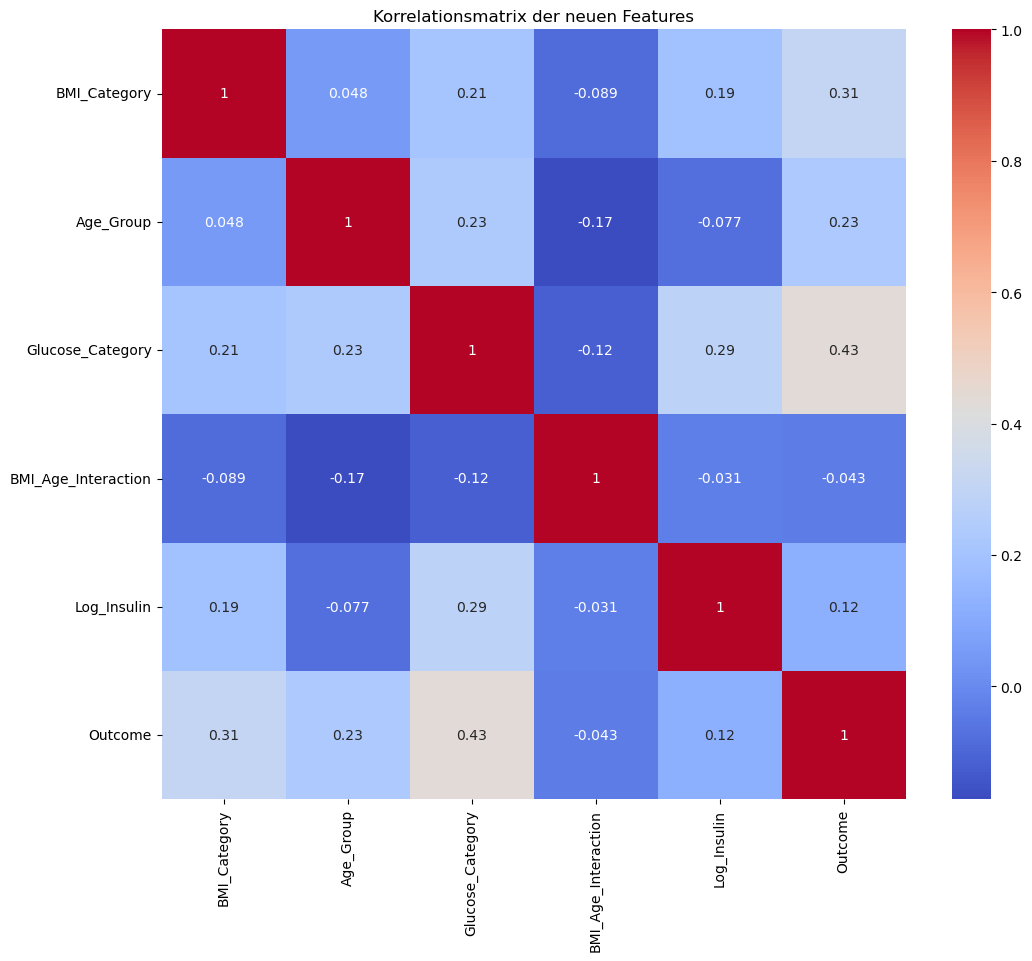

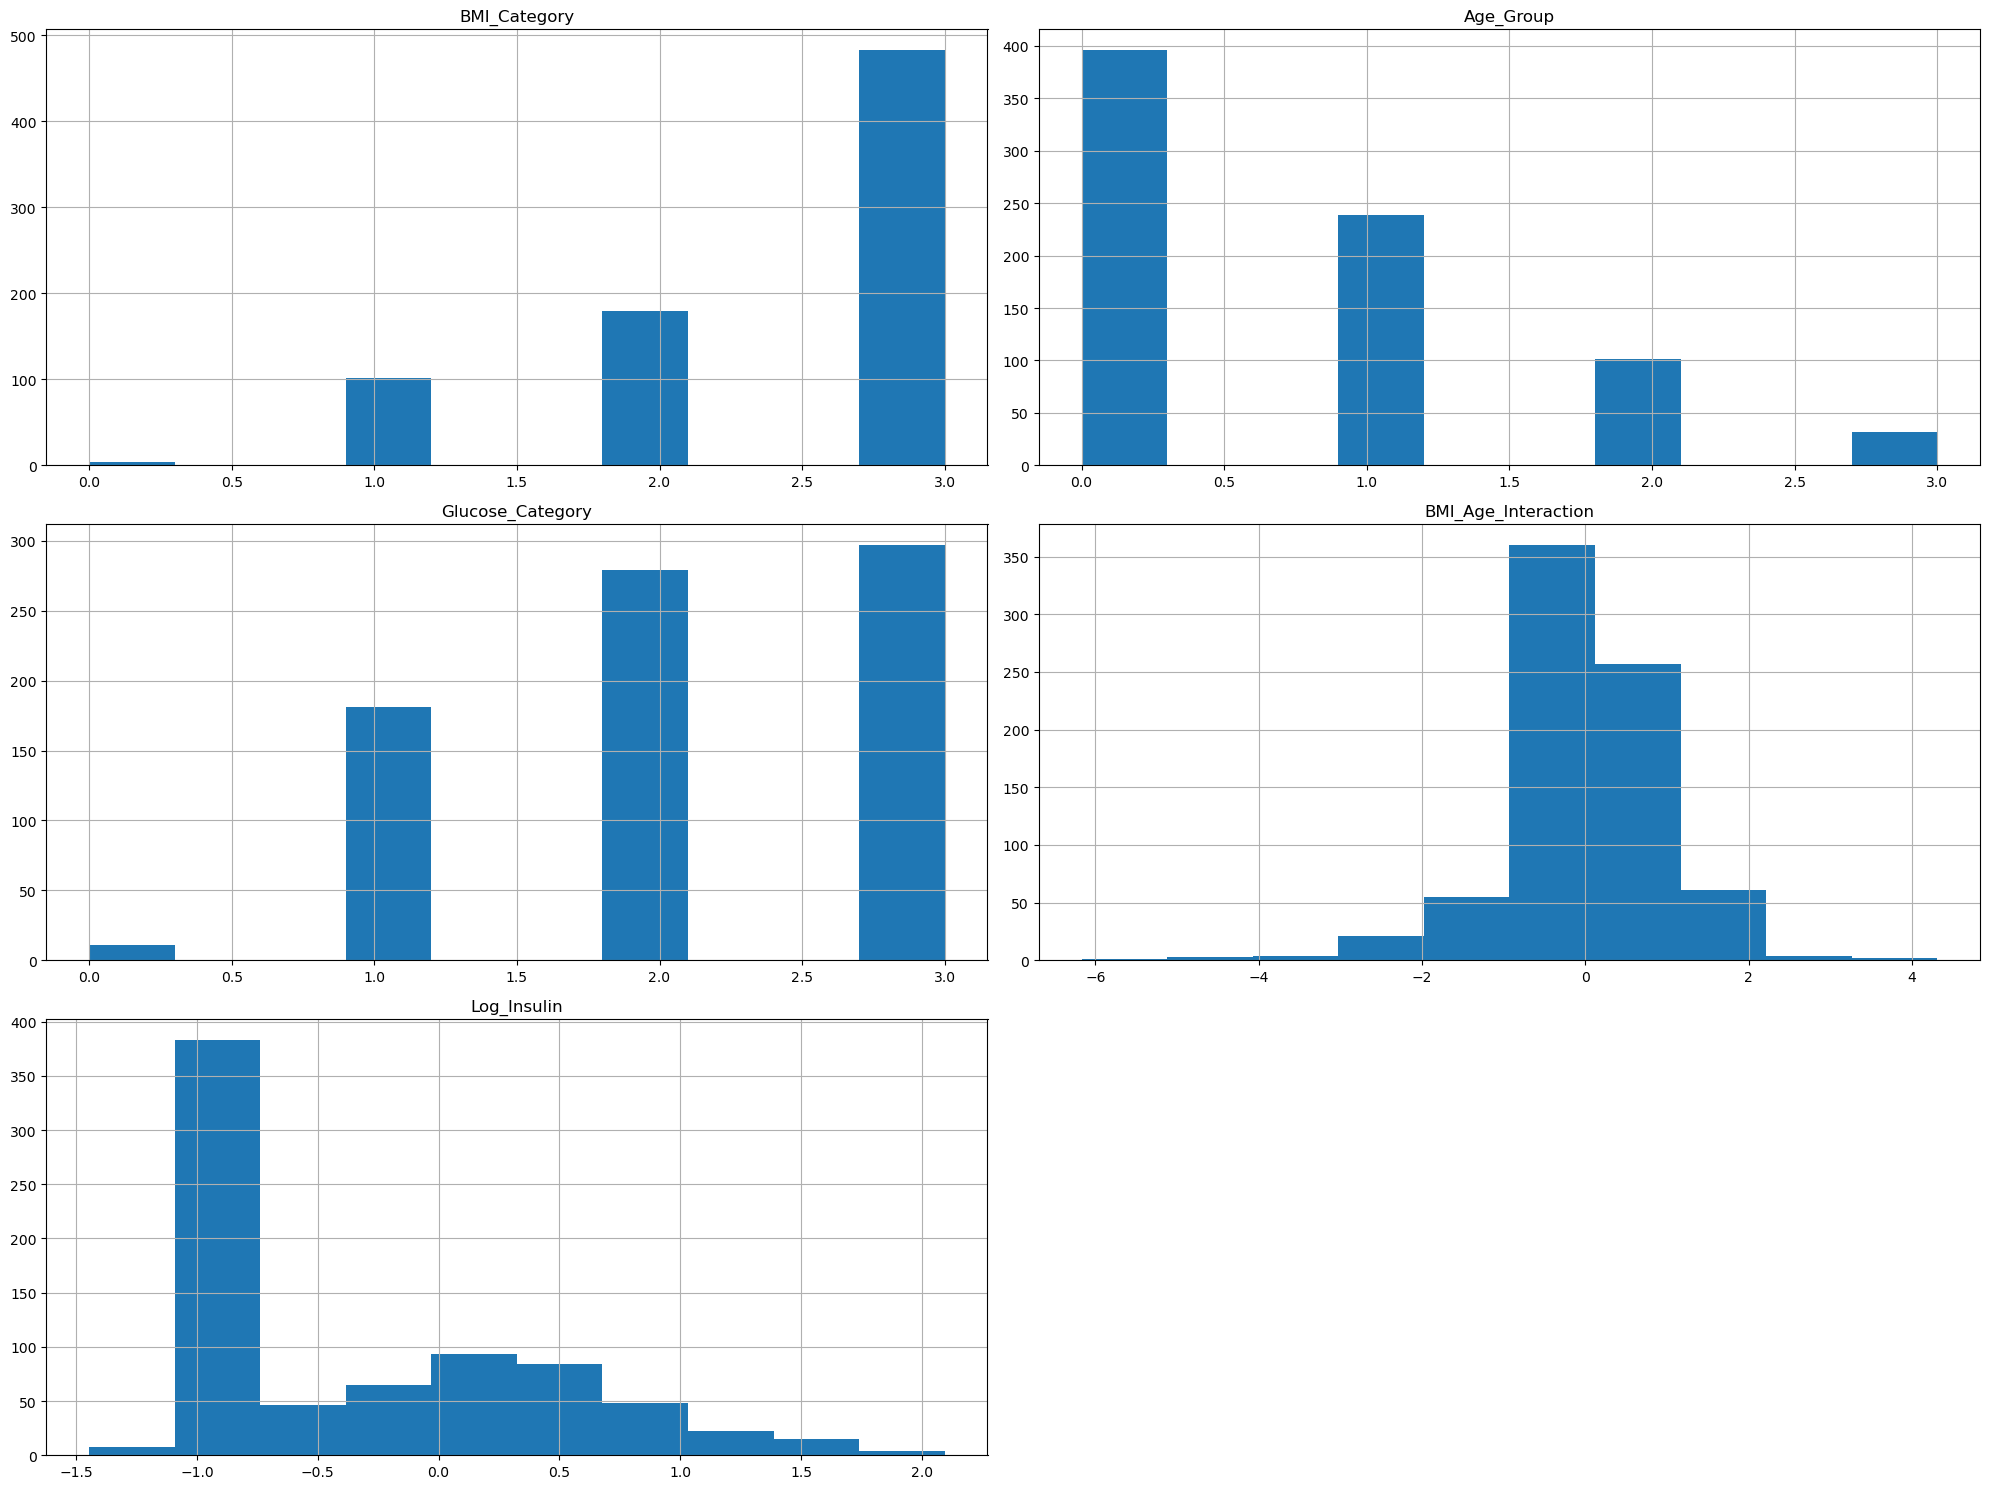

In [9]:
# Weitere Feature
df['BMI_Age_Interaction'] = df['BMI'] * df['Age']

import numpy as np
df['Log_Insulin'] = np.log1p(df['Insulin'])

# Korrelationsmatrix der neuen Features
new_corr = df[['BMI_Category', 'Age_Group', 'Glucose_Category', 'BMI_Age_Interaction', 'Log_Insulin', 'Outcome']].corr()

plt.figure(figsize=(12,10))
sns.heatmap(new_corr, annot=True, cmap='coolwarm')
plt.title('Korrelationsmatrix der neuen Features')
plt.show()

# Histogramme der neuen Features
df[['BMI_Category', 'Age_Group', 'Glucose_Category', 'BMI_Age_Interaction', 'Log_Insulin']].hist(figsize=(20,15))
plt.tight_layout()
plt.show()

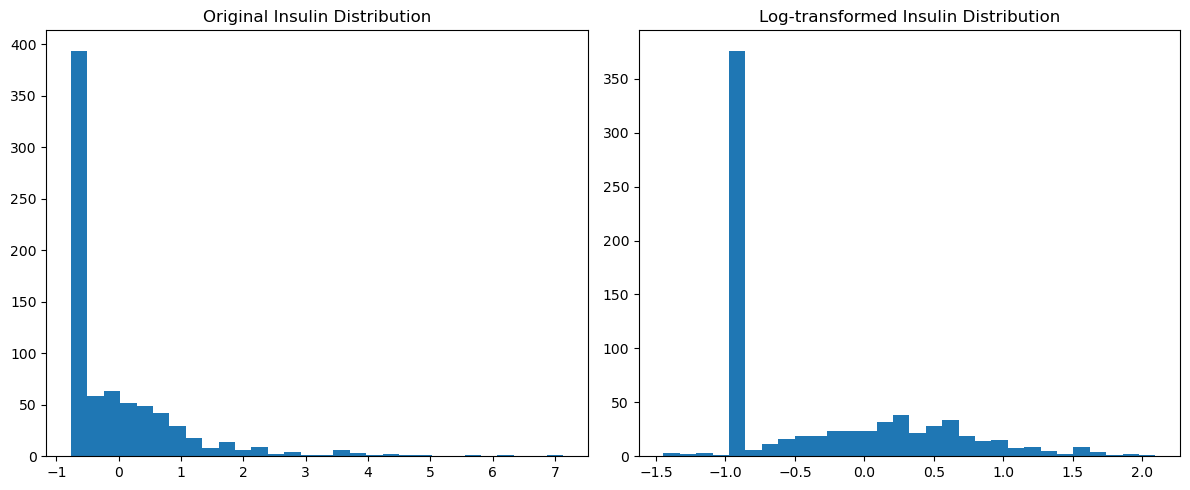

In [10]:
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.hist(df['Insulin'], bins=30)
plt.title('Original Insulin Distribution')
plt.subplot(122)
plt.hist(df['Log_Insulin'], bins=30)
plt.title('Log-transformed Insulin Distribution')
plt.tight_layout()
plt.show()

In [11]:
# Train Test Split
from sklearn.model_selection import train_test_split

X = df.drop('Outcome', axis=1)  # Alle Spalten außer 'Outcome'
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Vorhersagen auf dem Testset
y_pred = model.predict(X_test)

# Modellbewertung
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7597402597402597

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.83      0.82        99
           1       0.67      0.64      0.65        55

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.74       154
weighted avg       0.76      0.76      0.76       154



In [13]:
#Feature Importance
import pandas as pd

# Feature Importance für Logistische Regression
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': abs(model.coef_[0])
}).sort_values('importance', ascending=False)

print(feature_importance)

                     feature  importance
1                    Glucose    1.031485
8               BMI_Category    0.718530
5                        BMI    0.418498
9                  Age_Group    0.334213
6   DiabetesPedigreeFunction    0.217797
7                        Age    0.205855
10          Glucose_Category    0.204849
4                    Insulin    0.189869
2              BloodPressure    0.187905
11       BMI_Age_Interaction    0.153438
0                Pregnancies    0.140312
12               Log_Insulin    0.076518
3              SkinThickness    0.054881


In [14]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("\nRandom Forest Classification Report:\n", classification_report(y_test, rf_pred))

# Feature Importance für Random Forest
rf_feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print(rf_feature_importance)

Random Forest Accuracy: 0.7532467532467533

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154

                     feature  importance
1                    Glucose    0.194424
5                        BMI    0.115515
7                        Age    0.103442
6   DiabetesPedigreeFunction    0.090144
11       BMI_Age_Interaction    0.088425
10          Glucose_Category    0.076800
2              BloodPressure    0.066528
0                Pregnancies    0.054568
3              SkinThickness    0.053883
12               Log_Insulin    0.046654
4                    Insulin    0.044287
9                  Age_Group    0.034110
8               BMI_Category    0.031221


In [15]:
#Hyperparameter Tuning mit GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

best_model = grid_search.best_estimator_
best_pred = best_model.predict(X_test)

print("Optimized Random Forest Accuracy:", accuracy_score(y_test, best_pred))
print("\nOptimized Random Forest Classification Report:\n", classification_report(y_test, best_pred))

Best parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
Best cross-validation score: 0.7817939490870318
Optimized Random Forest Accuracy: 0.7662337662337663

Optimized Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.79      0.81        99
           1       0.66      0.73      0.69        55

    accuracy                           0.77       154
   macro avg       0.75      0.76      0.75       154
weighted avg       0.77      0.77      0.77       154

